# Problem 1 – statistics (30%)


In a first step, you are to compute various statistics on the data (univariate, multivariate), and
interpret these statistics results, e.g., the average movie rating indicates that [write your
interpretation], the correlation between variables X and Y suggests that [write your
interpretation], etc.
You can use any of the measures of central tendency, dispersion and correlation presented in the
lectures (and reading lists.)

# Step 0: Importing and Reading the Data (aka  Exploratory Data Analysis)

First, let's import the necessary libraries. For the sake of this problem, I'm going to read in data, check in packaging, look at top and bottom of data, and check your "n"s before I formulate a question, simply because I want to know what I'm working with before I make any questions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [4]:
df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')

# Step 1: Data Understanding
- Dataframe shape
- Head and Tail
- Dtypes
- Describe

In [5]:
#get shape of dataframe
df.shape

(1000, 9)

In [6]:
#inspect head to see how the data is formatted
df.head(5)

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...


In [7]:
#inspect tail, we see that there are some NaN values.
df.tail(5)

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes,Description
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."
999,999,Celda 211,2009,113,7.6,NaN,NaN,"69,464",The story of two men on different sides of a p...


In [8]:
df.dtypes

Unnamed: 0              int64
Movie Name             object
Year of Release        object
Watch Time              int64
Movie Rating          float64
Metascore of movie    float64
Gross                  object
Votes                  object
Description            object
dtype: object

We might want to convert Year of Release and Votes to a Number format, as we want to be able to compute statistics on the data. Year of release is preceeded by some numbers like I or II so, I just want the last four numbers.

# Brainstorming Hypothesis
The fields I think have potential to be worked with is Year of Release, Watch Time, Movie Rating, Metascore of Movie, Gross, and Votes. One thing that sort of concerns me is how in some fields, such as Gross or Metascore of movie, the fields are NaN. So perhaps I might not use these fields.

In terms of "Check your ns", the data looks correct! There appears to be 1000 tuples, which is in alignment with the 1000 top IMDb Movies.

In [9]:
#inspect columns
df.columns

Index(['Unnamed: 0', 'Movie Name', 'Year of Release', 'Watch Time',
       'Movie Rating', 'Metascore of movie', 'Gross', 'Votes', 'Description'],
      dtype='object')

# Step 2: Data Preparation
This can involve:
- Dropping columns and rows we don't want.
- Getting rid of Duplicates
- Renaming Fields
- Creating Features

I want to do some conversions so I can actually access some of the data and run analysis on it. I'll also drop columns I don't think are relevant, such as Description and Unnamed. 

In [10]:
#drop description and unnamed because they have nothing of value -- 
#we do axis =  1 because we want to drop columns and 1 means columsn.
df = df.drop(['Description', 'Unnamed: 0'], axis = 1)

In [11]:
#take df.shape again to see that we dropped 2 columns
df.shape

(1000, 7)

In [12]:
df.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"


In [13]:
df.tail(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336"
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004"
997,Shine,1996,105,7.6,87.0,35.81,"55,589"
998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822"
999,Celda 211,2009,113,7.6,NaN,NaN,"69,464"


Now that I've cleaned up the code a bit, I start brainstorming some queries on the data and forming questions/hypotheses. For the sake of this, we use the df1 datatype.

In [14]:
#we need to change Year of Release, Gross, Votes into things we can actually use. So we do conversions to numeric
df.dtypes

Movie Name             object
Year of Release        object
Watch Time              int64
Movie Rating          float64
Metascore of movie    float64
Gross                  object
Votes                  object
dtype: object

In [15]:
#see the number of NaN rows we have in each column--this shows us that there are NaN values in Metascore of movie and Gross
df.isna().sum()

Movie Name              0
Year of Release         0
Watch Time              0
Movie Rating            0
Metascore of movie    155
Gross                 162
Votes                   0
dtype: int64

In [16]:
#No duplications!
df.loc[df.duplicated()]

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes


In [17]:
df.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378"
1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588"
2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087"
3,Schindler's List,1993,195,9.0,95.0,96.9,"13,97,886"
4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211"


Now, I will convert the Year of Release into an int, Gross into an int, and Votes into an int. For year of release, we want to extract the last four values of the field, as when looking over the data, I saw values like I 1989 or 1234. 

In [18]:
#extract the last four values of the string and convert it to int
#this is to get rid of preceeding I and II.
df['Year of Release'] = df['Year of Release'].str.extract(r'(\d{4})').astype(int)

To convert votes, we need to parse through and get rid of all the commas. Then, we want to convert it to int.

In [19]:
#this is to replace all commas and get rid of them. Then we convert to int.
df['Votes'] = df['Votes'].str.replace(',', '', regex=True).astype(int)

We need to clean the Gross column before converting it to float. First, we need to get rid of non-numeric characters, and then convert. The reason why I do this is because when looking at the unedited data, I saw a column that displayed #222 as gross. This may cause errors when trying to convert to numeric, so we need to get rid of the non numeric characters.

In [20]:
#Convert value to float and get rid of non-numeric characters.
df['Gross'] = df['Gross'].str.replace('[^\d.]', '', regex=True).astype(float)

In [21]:
df.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,2777378
1,The Godfather,1972,175,9.2,100.0,134.97,1933588
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087
3,Schindler's List,1993,195,9.0,95.0,96.90,1397886
4,12 Angry Men,1957,96,9.0,97.0,4.36,824211


In [22]:
df.tail(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
995,Philomena,2013,98,7.6,77.0,37.71,102336
996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,75004
997,Shine,1996,105,7.6,87.0,35.81,55589
998,The Invisible Man,1933,71,7.6,87.0,NaN,37822
999,Celda 211,2009,113,7.6,NaN,NaN,69464


Everything looks good! Now I need to fill the NaN values and do data amputation. By replacing the NaN values with an average (as reccomended in class) I can help interpolate the data.

In [23]:
df.dtypes

Movie Name             object
Year of Release         int32
Watch Time              int64
Movie Rating          float64
Metascore of movie    float64
Gross                 float64
Votes                   int32
dtype: object

In [24]:
#first we select the columns with NaN values, or 
#the ones we want to do data amputation on.
columns_with_NaN = ['Gross', 'Metascore of movie']

#next, we calculate the means for these columns, so we can fill the NaN fields
averages = df[columns_with_NaN].mean()

#finally, we select the columns, and fill them with their respective averages.
df[columns_with_NaN] = df[columns_with_NaN].fillna(averages)

#looking to see if it worked...
df.tail(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
995,Philomena,2013,98,7.6,77.000000,37.710000,102336
996,Un long dimanche de fiançailles,2004,133,7.6,76.000000,6.170000,75004
997,Shine,1996,105,7.6,87.000000,35.810000,55589
998,The Invisible Man,1933,71,7.6,87.000000,73.016014,37822
999,Celda 211,2009,113,7.6,79.011834,73.016014,69464


We have thus filled the columns containing NaN values using the respective averages! Let's proceed with the data processing.

# Step 3: Feature Understanding:
- Univariate Analysis
    - Plotting Feature Distributions through:
        - Histogram
        - KDE
        - Boxplot

In [25]:
df['Movie Name'].value_counts()

Drishyam 2                                       2
Scarface                                         2
Drishyam                                         2
The Shawshank Redemption                         1
La montaña sagrada                               1
                                                ..
Black                                            1
Her Sey Çok Güzel Olacak                         1
Anand                                            1
Mission: Impossible - Dead Reckoning Part One    1
Celda 211                                        1
Name: Movie Name, Length: 997, dtype: int64

Text(0, 0.5, 'Count by Movie')

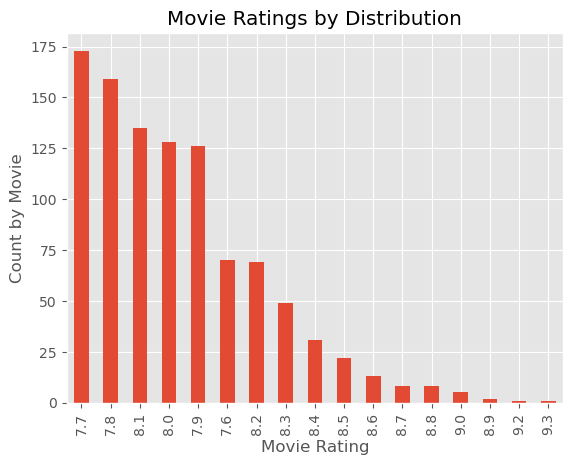

In [26]:
#create bar chart to see movie ratings by distribution, we graph the movie rating up against the
#count of the movie, which is the purpose of value_counts()
ax = df['Movie Rating'].value_counts()\
.plot(kind='bar', title = 'Movie Ratings by Distribution')
ax.set_xlabel('Movie Rating')
ax.set_ylabel('Count by Movie')

Text(0.5, 0, 'Metascore')

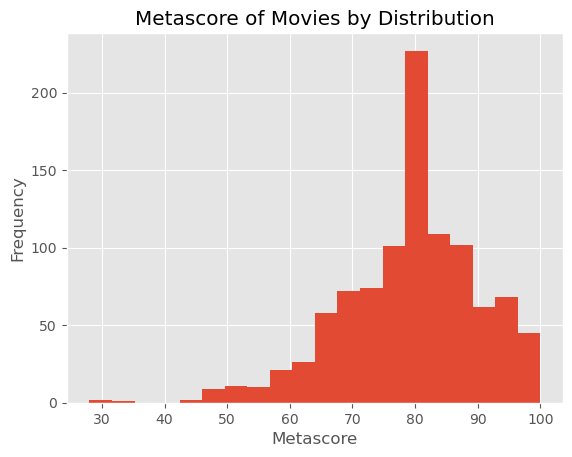

In [27]:
#plot histogram of the chart using matplot lib, This is just for visualiztation purposes (personal) 
#and is in no way part of p1. This is more so done for me so I can kind of get an idea of how the data
#is meant to be distributed, as shown in the df.describe()
ax1 = df['Metascore of movie'].plot(kind='hist', bins=20, title = 'Metascore of Movies by Distribution')
ax1.set_xlabel('Metascore')

Let's run a quick summary of the data as well. We ignore Unnamed: 0, as it doesn't really have any data of value.

In [28]:
#this gives us descriptive statistics on the dataframe, 
#allowing us to get values that summarize central tendency, dispersion
# and shape of the dispersion. I use this to compute the general values.
df.describe()

,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1991.666000,124.253000,7.970200,79.011834,73.016014,3.190469e+05
std,24.188045,28.800355,0.275732,11.005772,105.326037,3.871814e+05
min,1920.000000,45.000000,7.600000,28.000000,0.000000,2.581300e+04
25%,1975.000000,103.000000,7.800000,73.000000,5.010000,6.238100e+04
50%,1999.000000,120.000000,7.900000,79.011834,44.805000,1.581340e+05
75%,2011.000000,139.000000,8.100000,86.000000,73.016014,4.436372e+05
max,2023.000000,321.000000,9.300000,100.000000,936.660000,2.777378e+06


# Step 4: Feature Relationships

In [29]:
df.head(5)

,Movie Name,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,2777378
1,The Godfather,1972,175,9.2,100.0,134.97,1933588
2,The Dark Knight,2008,152,9.0,84.0,534.86,2754087
3,Schindler's List,1993,195,9.0,95.0,96.90,1397886
4,12 Angry Men,1957,96,9.0,97.0,4.36,824211


In [30]:
#.corr gives us the pariwise correlation of all columns within the dataframe passed in
#we use this to determine the compute multivariate analysis on the data, which will
#help us to decide which graphs to plot in the next problem.
df_corr = df[['Year of Release', 'Watch Time','Movie Rating',
                       'Metascore of movie','Gross', 'Votes']].corr()
df_corr

,Year of Release,Watch Time,Movie Rating,Metascore of movie,Gross,Votes
Year of Release,1.000000,0.208913,-0.070580,-0.321408,0.182873,0.238391
Watch Time,0.208913,1.000000,0.272353,-0.034591,0.107278,0.154984
Movie Rating,-0.070580,0.272353,1.000000,0.241215,0.127006,0.483813
Metascore of movie,-0.321408,-0.034591,0.241215,1.000000,-0.059320,-0.063338
Gross,0.182873,0.107278,0.127006,-0.059320,1.000000,0.532086
Votes,0.238391,0.154984,0.483813,-0.063338,0.532086,1.000000
